# numpy实操

绘制直方图，注意学习bin格子大小的设置

[[7426393   78240   13548     705]
 [ 494203    2651    1309       0]
 [ 142819   13119     151    1141]
 ...
 [ 109222    4840      35     212]
 [ 626223   22962     532    1559]
 [  99228    1699      23     135]]
(1356,)


(array([139.,  65.,  61.,  54.,  45.,  40.,  57.,  56.,  29.,  39.,  37.,
         28.,  29.,  20.,  19.,  13.,  14.,   9.,  23.,  14.,  20.,  20.,
         15.,  15.,   9.,  21.,  12.,  17.,  16.,   7.,  12.,  10.,  12.,
          6.,  10.,  11.,   6.,   5.,   7.,  10.,   9.,   9.,  14.,   8.,
         12.,  11.,  10.,  10.,   6.,   4.,   9.,   3.,   5.,   6.,   7.,
          8.,   5.,   3.,   2.,   4.,   3.,   4.,   8.,   7.,   4.,   4.,
          7.,   8.,   2.,   3.,   5.,  10.,   5.,   5.,   5.,   2.,   2.,
          9.,   6.,   4.,   4.,   8.,   7.,   5.,   3.,   4.,   3.,   3.,
          2.,   5.,   6.,   2.,   4.,   6.,   4.,   2.,   3.,   4.,   1.]),
 array([   0.        ,   50.38383838,  100.76767677,  151.15151515,
         201.53535354,  251.91919192,  302.3030303 ,  352.68686869,
         403.07070707,  453.45454545,  503.83838384,  554.22222222,
         604.60606061,  654.98989899,  705.37373737,  755.75757576,
         806.14141414,  856.52525253,  906.90909091,  957.29

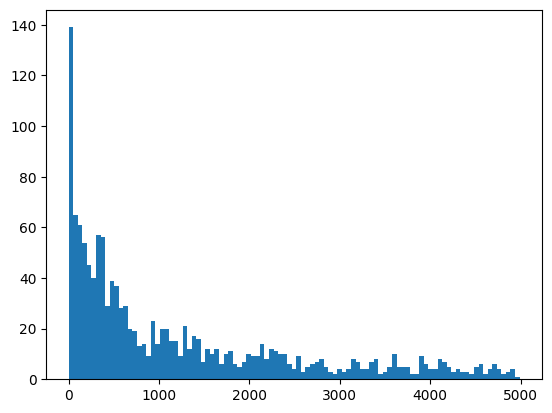

In [14]:
import numpy as np
from matplotlib import pyplot as plt
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
t_us = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_uk = np.loadtxt(uk_file_path,delimiter=",",dtype="int")
print(t_uk)

#筛选like数小于 500000的视频
t_uk_like = t_uk[:,1]
t_uk_comment = t_uk[:,-1]
t_uk_comment = t_uk_comment[t_uk_comment<=5000]
print(t_uk_comment.shape)
d = 50
bin_nums = (t_uk_comment.max()-t_uk_comment.min())//d
plt.hist(t_uk_comment,bin_nums)
# plt.figure(figsize=(20,8))
# plt.xlabel('like')
# plt.ylabel('comment')
# plt.scatter(t_uk_like,t_uk_comment)
# plt.show()

绘制散点图，注意学习通过某个字段值过滤元素后xy轴个数不对齐的处理

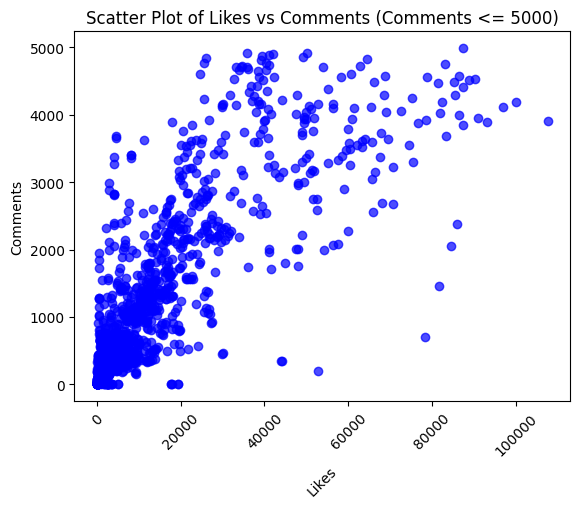

In [20]:
t_uk_like = t_uk[:, 1]  # 第二列是 like 数量
t_uk_comment = t_uk[:, -1]  # 最后一列是 comment 数量

# 筛选评论数小于5000的视频
mask = t_uk_comment <= 5000  # 创建筛选条件

# 通过筛选条件，得到对应的 like 和 comment 数组
filtered_likes = t_uk_like[mask]  # 筛选后的 like 数量
filtered_comments = t_uk_comment[mask]  # 筛选后的 comment 数量

# 绘制散点图
plt.scatter(filtered_likes, filtered_comments, alpha=0.7, color='blue')
plt.title('Scatter Plot of Likes vs Comments (Comments <= 5000)')
plt.xlabel('Likes',rotation = 45)
plt.xticks(rotation=45)
plt.ylabel('Comments')
plt.show()

# numpy copy和view

view     a = b[:],视图的操作，一种切片，会创建新的对象a，但是a的数据完全由b保管，
他们两个的数据变化是一致的

In [22]:
b = np.array([[1,2],[3,4]])
a = b[:]
b[1][1] = 100
a

array([[  1,   2],
       [  3, 100]])

赋值  a = b, 也会相互影响

In [ ]:
b = np.array([[1,2],[3,4]])
c = b
c[1][1] = 100
c


copy 复制出来的副本，无影响

In [25]:
b = np.array([[1,2],[3,4]])
d = b.copy()
d[1][1] = 100
b

array([[1, 2],
       [3, 4]])